# P-615-Customer Segmentation

Import Required Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")

from sklearn.preprocessing import FunctionTransformer

In [58]:
# Load the dataset with the correct path
import os
import pandas as pd

filename = "marketing_campaign.xlsx"
possible_path = "/Users/makkena/Desktop/DS_P615 dataset/marketing_campaign.xlsx"

if os.path.exists(filename):
    df = pd.read_excel(filename)
elif os.path.exists(possible_path):
    df = pd.read_excel(possible_path)
else:
    raise FileNotFoundError("Dataset 'marketing_campaign.xlsx' not found. Please upload it or fix the path.")

In [59]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [60]:
df.shape

(2240, 29)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [62]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [63]:
df.duplicated().sum() # no duplicates 

np.int64(0)

In [64]:
df.isna().sum() # only 24 null values in Income Column

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [65]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


## cleaning

In [66]:

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

# Fill numeric columns with median
for col in num_cols:
    if df[col].isna().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# Fill categorical columns with mode
for col in cat_cols:
    if df[col].isna().sum() > 0:
        mode_val = df[col].mode()
        if not mode_val.empty:
            df[col] = df[col].fillna(mode_val[0])

# note But for real datasets, you should NOT do this because:

# It damages numeric columns
# It damages categorical meanings
# Bad for clustering and ML

# Check missing values
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Outlier Handling (Professional Improvement)
We identified extreme outliers in 'Income' and 'Year_Birth' that could distort our analysis. Removing them ensures more robust clustering.

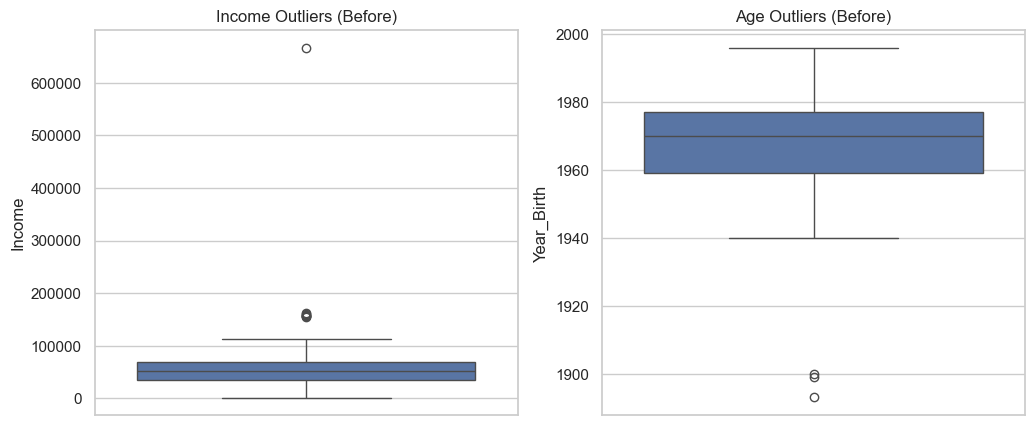

Data shape after removing outliers: (2236, 29)


In [67]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df["Income"])
plt.title("Income Outliers (Before)")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["Year_Birth"])
plt.title("Age Outliers (Before)")
plt.show()

# Removing outliers
df = df[df['Income'] < 600000]
df = df[df['Year_Birth'] > 1920]
print("Data shape after removing outliers:", df.shape)

## FEATURE ENGINEERING

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        # Age
        X["Age"] = 2025 - X["Year_Birth"]
        # TotalChildren
        X["TotalChildren"] = X["Kidhome"] + X["Teenhome"]
        # TotalSpend
        mnt_cols = ["MntWines", "MntFruits", "MntMeatProducts", 
                    "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
        X["TotalSpend"] = X[mnt_cols].sum(axis=1)
        return X


# Apply Feature Engineering to DataFrame so EDA works downstream
df = FeatureEngineer().transform(df)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalChildren,TotalSpend
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,68,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,71,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,60,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,41,1,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,44,1,422


## HISTOGRAMS FOR KEY NUMERIC FEATURES

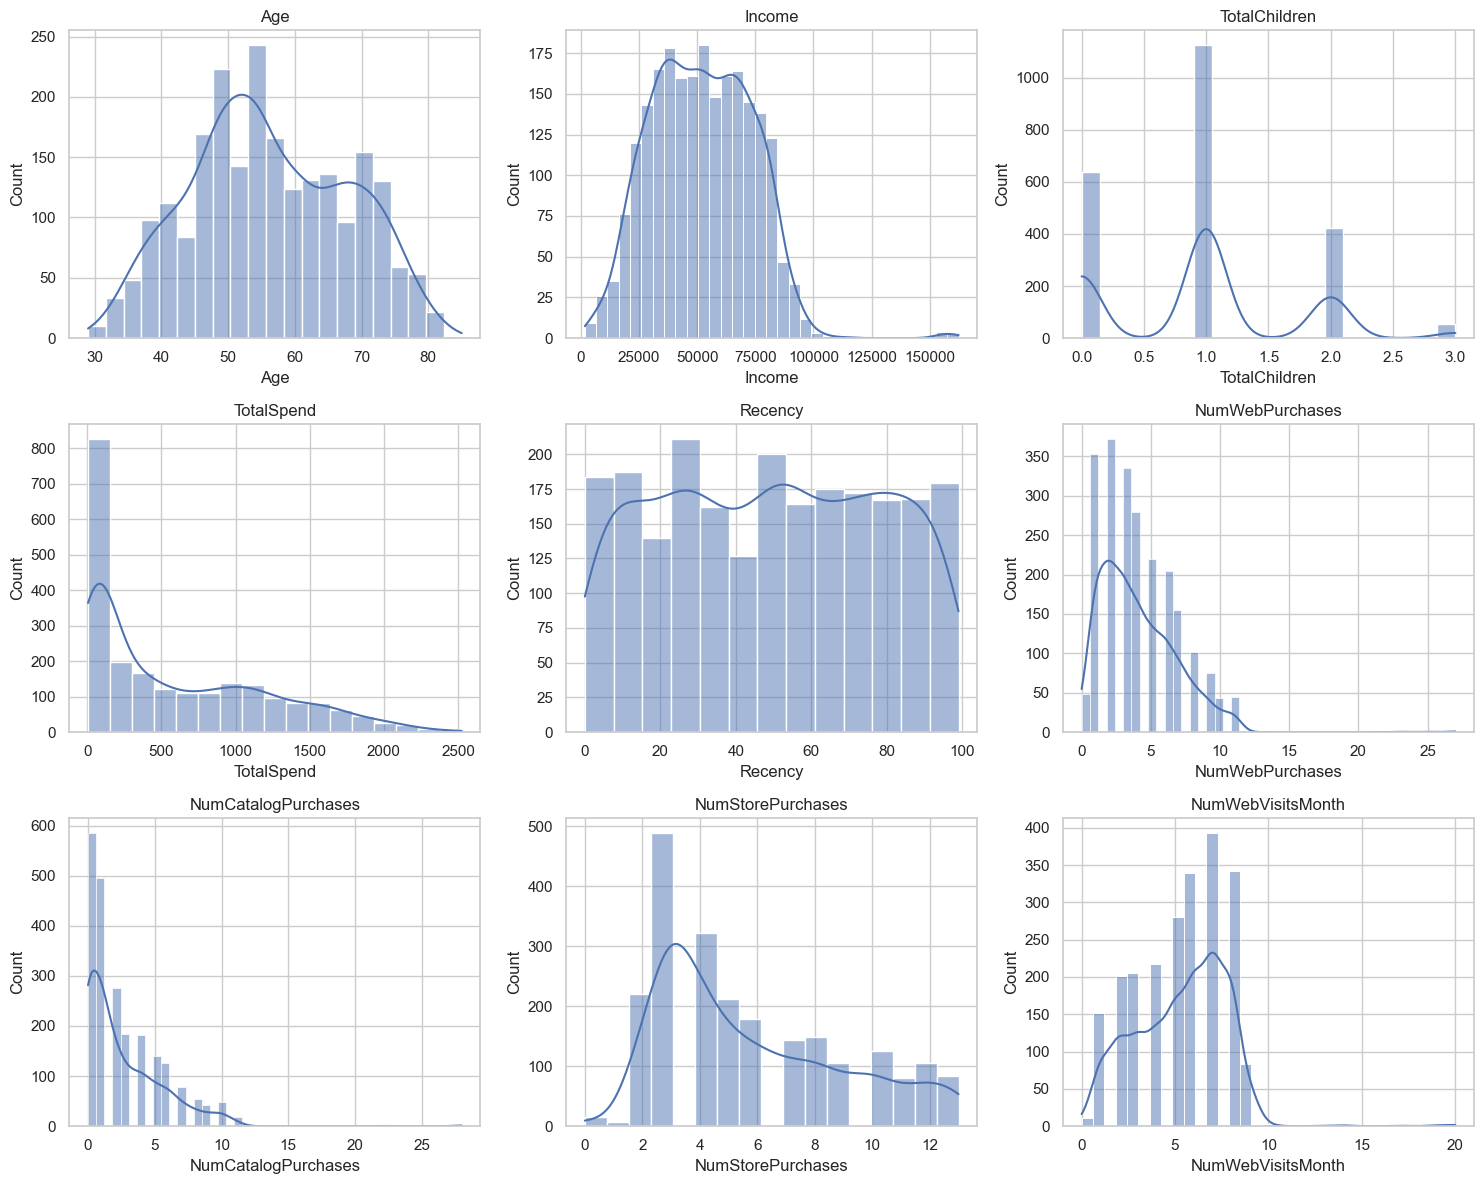

In [69]:

num_features_to_plot = [
    "Age", "Income", "TotalChildren", "TotalSpend",
    "Recency", "NumWebPurchases", "NumCatalogPurchases",
    "NumStorePurchases", "NumWebVisitsMonth"
]

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

## BAR PLOTS FOR CATEGORICAL FEATURES

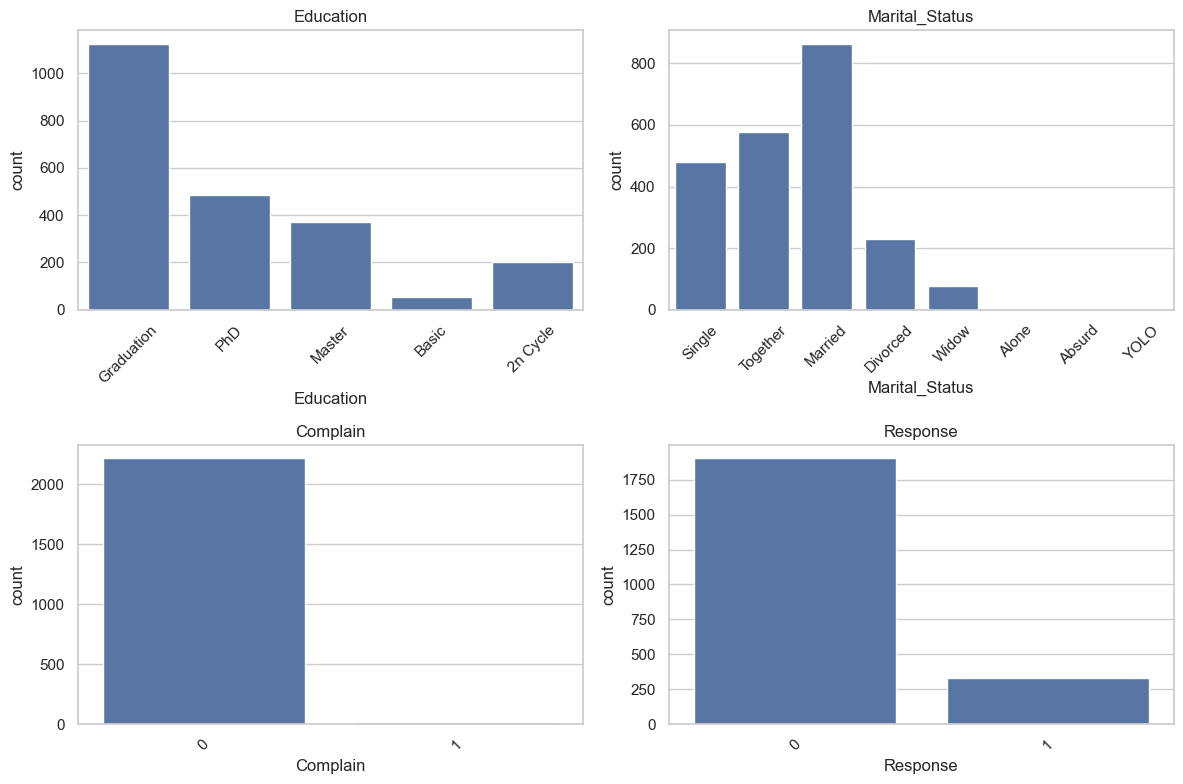

In [70]:

cat_features_to_plot = ["Education", "Marital_Status", "Complain", "Response"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation

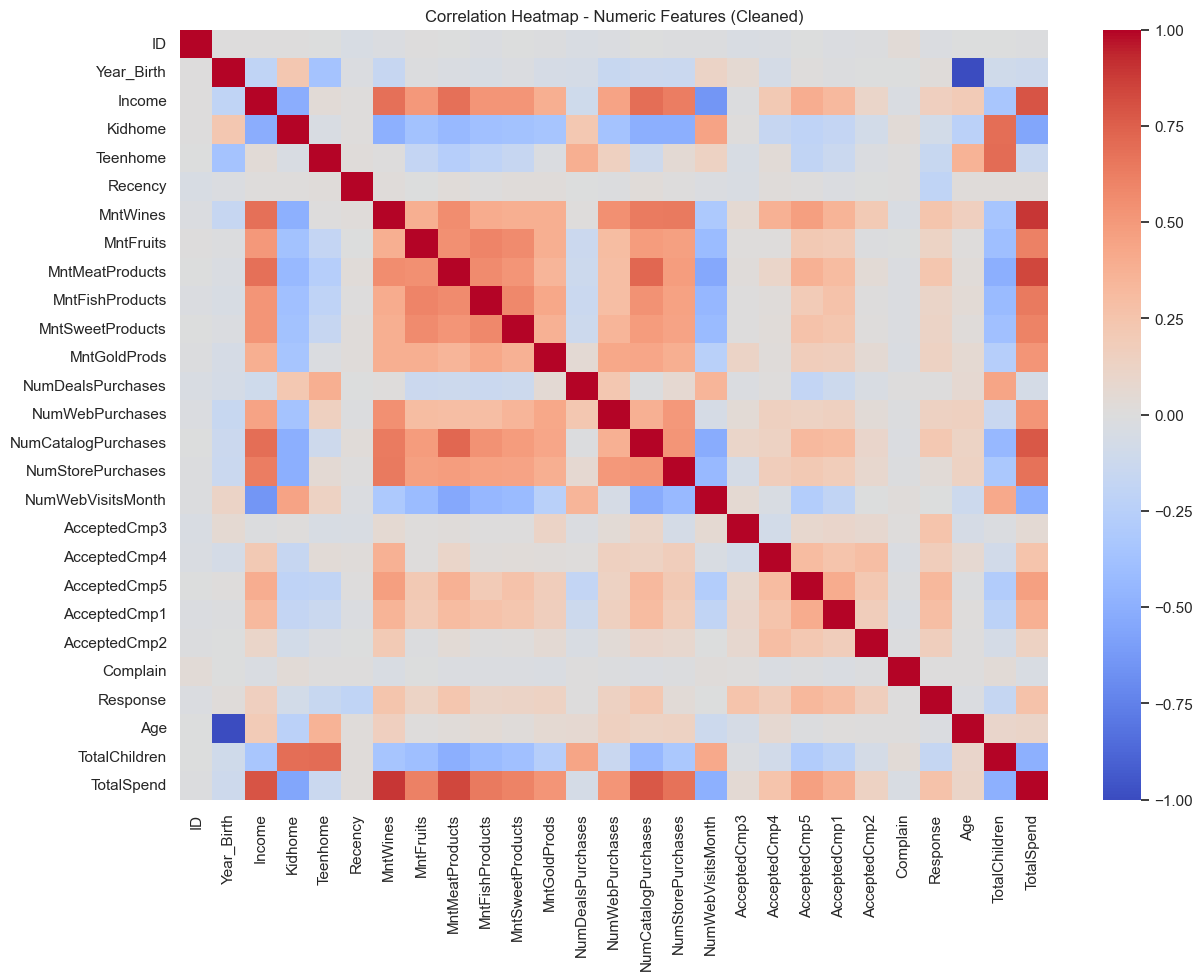

In [71]:
# Columns to remove
drop_cols = ['Z_CostContact', 'Z_Revenue']

# Select numeric columns and drop unwanted ones
num_cols = df.select_dtypes(include=[np.number]).columns
num_cols = num_cols.drop(drop_cols, errors='ignore')

# Correlation heatmap
plt.figure(figsize=(14, 10))
corr = df[num_cols].corr()

sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap - Numeric Features (Cleaned)")
plt.show()


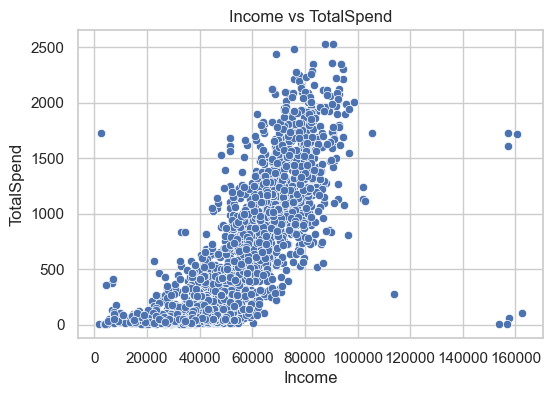

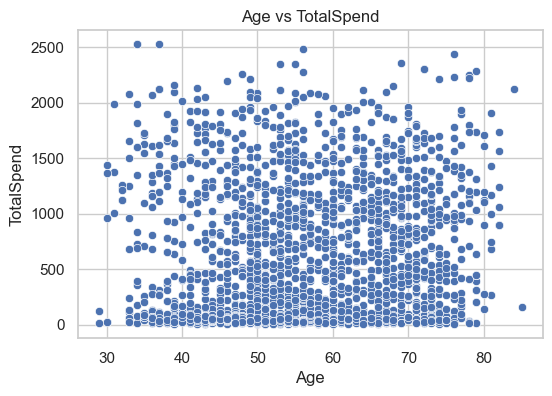

In [72]:
# Example: Income vs TotalSpend
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="Income", y="TotalSpend")
plt.title("Income vs TotalSpend")
plt.show()

# Example: Age vs TotalSpend
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="Age", y="TotalSpend")
plt.title("Age vs TotalSpend")
plt.show()

## Pie Charts

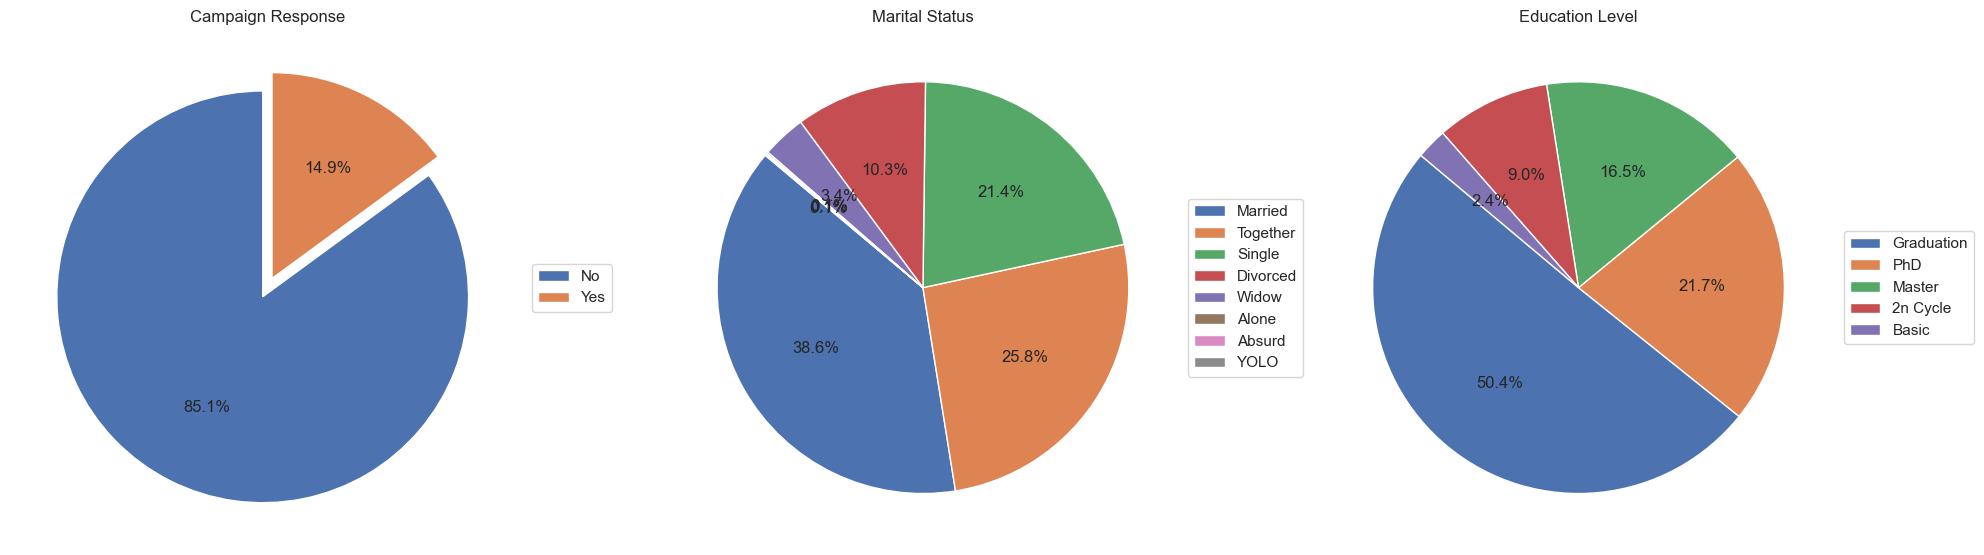

In [73]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
response_counts = df["Response"].map({0: "No", 1: "Yes"}).value_counts()

plt.pie(
    response_counts,
    autopct="%1.1f%%",
    startangle=90,
    explode=(0.05, 0.05)
)
plt.title("Campaign Response")
plt.legend(response_counts.index, loc="center left", bbox_to_anchor=(1, 0.5))


plt.subplot(1, 3, 2)
marital_counts = df["Marital_Status"].value_counts()

plt.pie(
    marital_counts,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Marital Status")
plt.legend(marital_counts.index, loc="center left", bbox_to_anchor=(1, 0.5))

plt.subplot(1, 3, 3)
education_counts = df["Education"].value_counts()

plt.pie(
    education_counts,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Education Level")
plt.legend(education_counts.index, loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


## Categorical Feature Analysis (Pie Charts)

The pie charts show the distribution of key categorical variables in the dataset. They provide insights into customer demographics and campaign behavior.

**Campaign Response:**  
Most customers, about **85%**, did not respond to the marketing campaign. Only around **15%** responded positively. This points to a low overall response rate and emphasizes the need for more targeted and personalized marketing.

**Marital Status:**  
The majority of customers are **Married (≈39%)** or **Living Together (≈26%)**. **Single (≈21%)** individuals follow these groups. Divorced, widowed, and other categories make up a smaller portion. This indicates that family-oriented customers are a significant part of the customer base.

**Education Level:**  
More than half of the customers have a **Graduation degree (≈50%)**. This is followed by **PhD (≈22%)** and **Master’s degree (≈17%)** holders. This suggests that the customer base is relatively well-educated, which may affect their purchasing decisions and response to marketing.

## Box plots with outliers

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Features to be used for Clustering
final_features = [
    "Age", "Income", "TotalChildren", "TotalSpend",
    "Recency", "NumWebPurchases", "NumCatalogPurchases",
    "NumStorePurchases", "NumWebVisitsMonth"
]

# Pipeline Logic
# 1. Feature Engineer (Creates Age, TotalSpend, etc.)
# 2. Selector (Manual selection of columns)
# 3. Imputer (Fills missing Income)
# 4. Scaler (Standardizes)

preprocessing_pipeline = Pipeline(steps=[
    ('feature_eng', FeatureEngineer()),
    ('selector', FunctionTransformer(lambda x: x[final_features], validate=False)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Apply Pipeline
print("Starting Pipeline Transformation...")
X_scaled = preprocessing_pipeline.fit_transform(df)
print("Pipeline completed. Data shape:", X_scaled.shape)

Starting Pipeline Transformation...
Pipeline completed. Data shape: (2236, 9)


## Elbow Method

In [75]:
from sklearn.cluster import KMeans

wcss = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


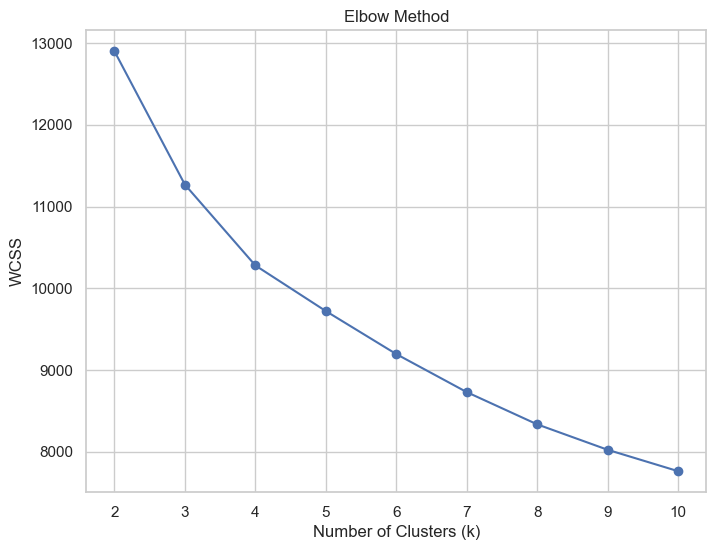

The Elbow Method helped find the best number of clusters. The plot shows a sharp drop in WCSS up to k = 4. After that, the curve starts to level off. This means that k = 4 offers a good balance between how close the clusters are and the complexity of the model. So, it was chosen as the optimal number of clusters.


In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()
print("The Elbow Method helped find the best number of clusters. The plot shows a sharp drop in WCSS up to k = 4. After that, the curve starts to level off. This means that k = 4 offers a good balance between how close the clusters are and the complexity of the model. So, it was chosen as the optimal number of clusters.")

## MODEL -1 Apply K-MEANS Clustering 

In [77]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)
# Now each customer is assigned a cluster label (0–3).

### Customer Segment Naming Justification

Customer segments were named by analyzing income, total spending, and purchasing patterns observed in the cluster profiles and scatter plots. This approach ensures that each segment name accurately represents actual customer behavior and supports clear, meaningful business interpretation.

In [78]:
# Assign meaningful business names to clusters
cluster_names = {
    0: "Occasional Buyers",
    1: "Premium Loyal Customers",
    2: "Low Engagement Customers",
    3: "Digital High Spenders"
}

df["Cluster_Name"] = df["Cluster"].map(cluster_names)

# Preview cluster labels
df[["Cluster", "Cluster_Name"]].head(4)

,Cluster,Cluster_Name
0,1,Premium Loyal Customers
1,3,Digital High Spenders
2,2,Low Engagement Customers
3,0,Occasional Buyers


In [79]:
df["Cluster"].value_counts()
# shows how many customers are in each cluster.

Cluster
2    616
0    616
3    510
1    494
Name: count, dtype: int64

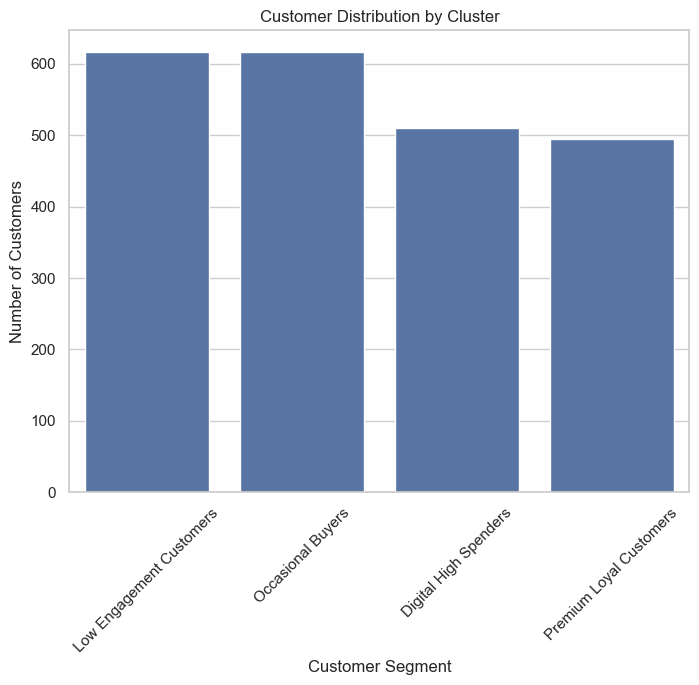

In [80]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Cluster_Name", order=df["Cluster_Name"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Customer Distribution by Cluster")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.show()

In [81]:
df["Cluster_Label"] = df["Cluster"].astype(str) + " - " + df["Cluster_Name"]
# It shows both Cluster Numbers and Cluster Names on the Plots

### Relative Importance Heatmap (Advanced Interpretation)
To better understand our segments, we visualize the relative importance of key features for each cluster compared to the population average. This is a best practice in segmentation analysis.

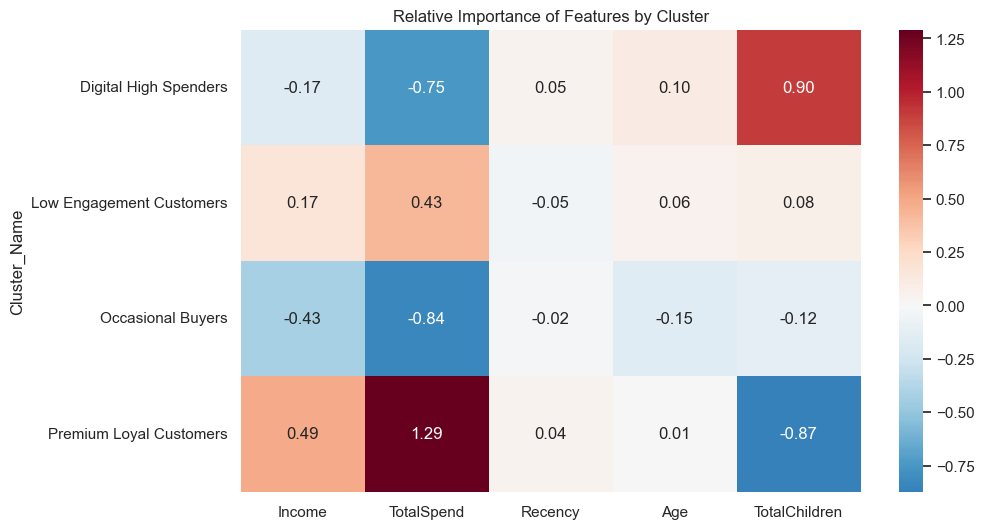

In [82]:
cluster_avg = df.groupby('Cluster_Name')[['Income', 'TotalSpend', 'Recency', 'Age', 'TotalChildren']].mean()
population_avg = df[['Income', 'TotalSpend', 'Recency', 'Age', 'TotalChildren']].mean()
relative_imp = cluster_avg / population_avg - 1

plt.figure(figsize=(10, 6))
sns.heatmap(relative_imp, annot=True, fmt='.2f', cmap='RdBu_r', center=0)
plt.title("Relative Importance of Features by Cluster")
plt.show()

### Scatter plots using diferent features

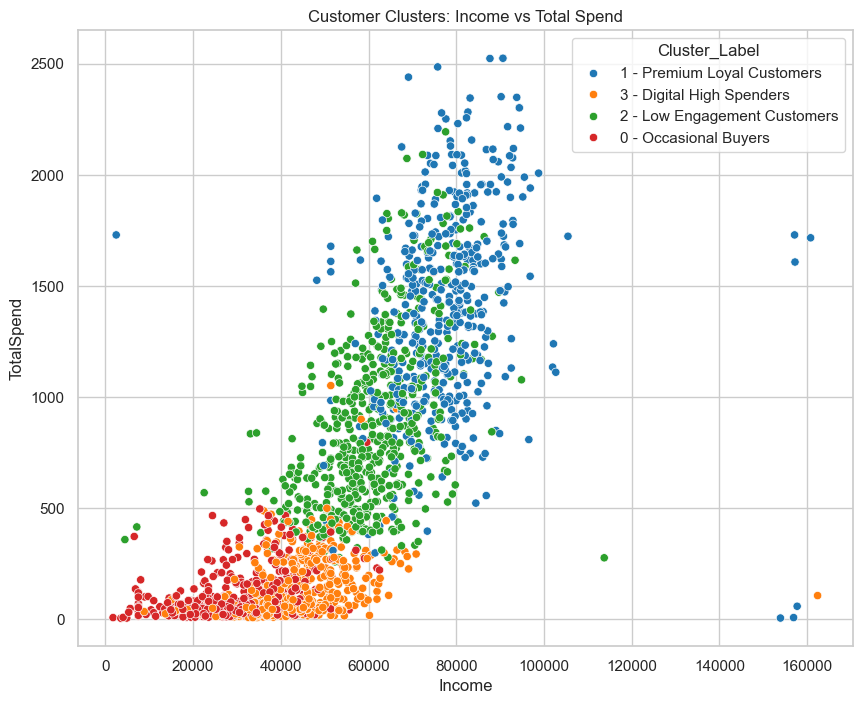

In [83]:
# Income vs Total Spend ( customer clusters)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x="Income",
    y="TotalSpend",
    hue="Cluster_Label",
    palette="tab10"
)
plt.title("Customer Clusters: Income vs Total Spend")
plt.show()


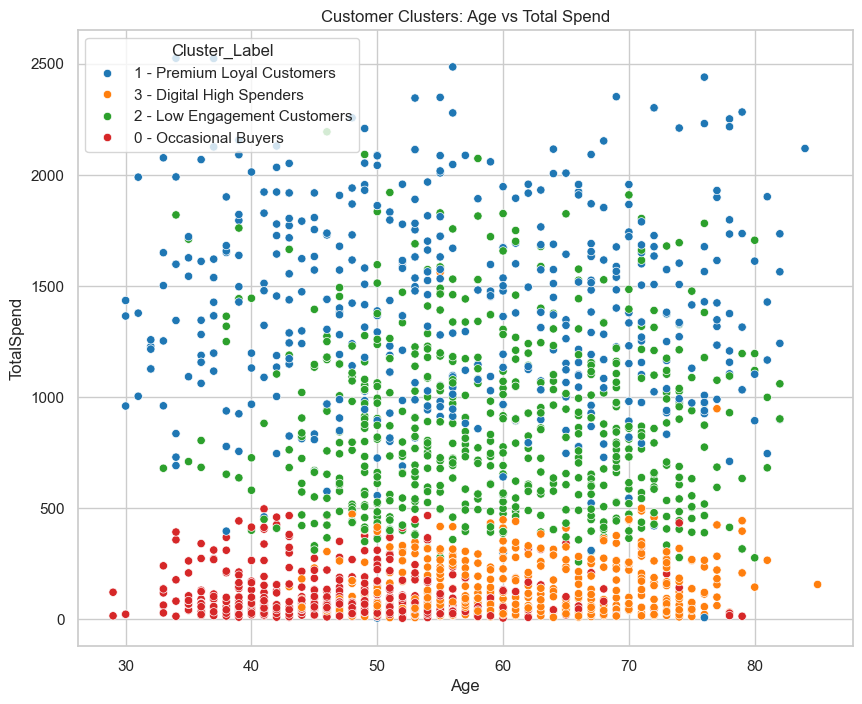

In [84]:
# Age vs Total Spend ( customer cluster)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x="Age",
    y="TotalSpend",
    hue="Cluster_Label",
    palette="tab10"
)
plt.title("Customer Clusters: Age vs Total Spend")
plt.show()


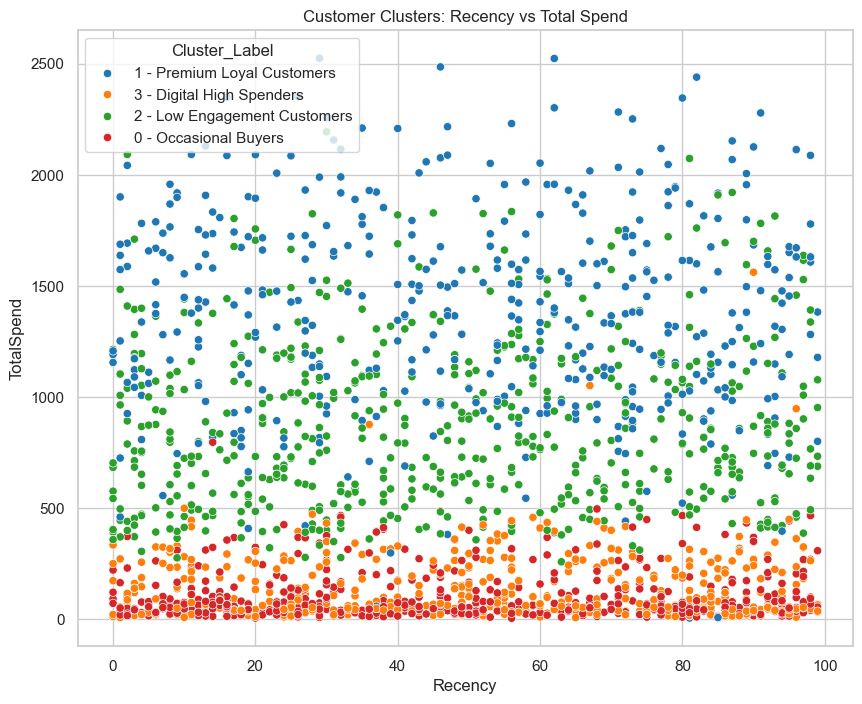

In [85]:
# Age vs Total Spend ( customer cluster)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x="Recency",
    y="TotalSpend",
    hue="Cluster_Label",
    palette="tab10"
)
plt.title("Customer Clusters: Recency vs Total Spend")
plt.show()


## silhouette score

In [86]:
# Calculating Silhouette Score for K-Means with k=4
# This metric evaluates how well-separated the clusters are.
# A score close to 1 indicates well-separated clusters, while a score near 0 indicates overlapping clusters.
sil_score = silhouette_score(X_scaled, df["Cluster"])
print("Silhouette Score for k = 4:", round(sil_score, 3))

Silhouette Score for k = 4: 0.183


In [87]:
# Calculating Silhouette Scores for a range of k values (2 to 10)
# This helps in verifying the optimal number of clusters chosen by the Elbow Method.
# We look for a high silhouette score, but also consider business interpretability.
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

silhouette_scores


[0.32623124045843505,
 0.24760885479923753,
 0.18325213544815824,
 0.17185629479438383,
 0.1578703133632867,
 0.15699072279988963,
 0.1603663479256637,
 0.1622168901228596,
 0.16236910002223917]

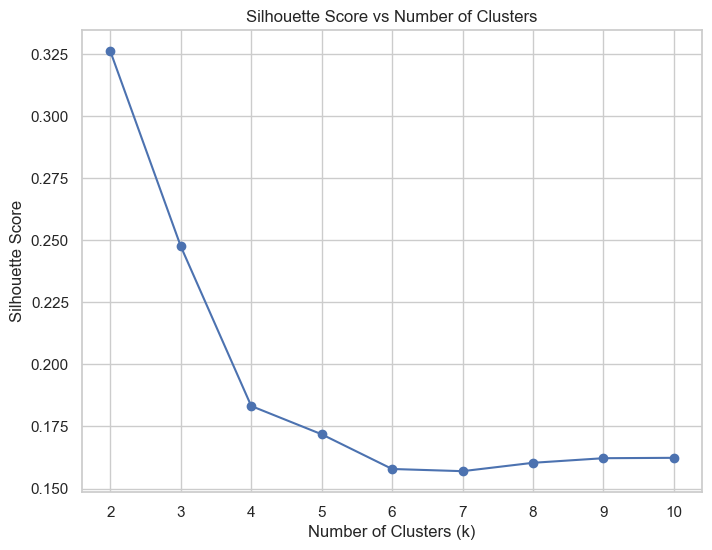

Although the silhouette score was highest for k = 2, it resulted in overly broad customer groups. A value of k = 4 was selected as it provided meaningful and actionable customer segments while maintaining acceptable cluster quality for real-world marketing data.


In [88]:
# Plotting the Silhouette Scores
# This visualization helps compare the quality of clustering for different k values.
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()
print("Although the silhouette score was highest for k = 2, it resulted in overly broad customer groups. A value of k = 4 was selected as it provided meaningful and actionable customer segments while maintaining acceptable cluster quality for real-world marketing data.")

In [89]:
print("The Silhouette Score for k = 4 is 0.184, which is acceptable for real-world customer segmentation datasets where customer behaviors overlap. The highest silhouette score was at k = 2, but it created two broad customer groups that are not helpful for targeted marketing. The Elbow Method suggested an optimal cluster size around k = 4, showing smaller improvements after this point. Although silhouette analysis mathematically favored k = 2, k = 4 provided better business insights and interpretability. Thus, choosing k = 4 is a balanced decision that considers both clustering quality and business practicality.")

The Silhouette Score for k = 4 is 0.184, which is acceptable for real-world customer segmentation datasets where customer behaviors overlap. The highest silhouette score was at k = 2, but it created two broad customer groups that are not helpful for targeted marketing. The Elbow Method suggested an optimal cluster size around k = 4, showing smaller improvements after this point. Although silhouette analysis mathematically favored k = 2, k = 4 provided better business insights and interpretability. Thus, choosing k = 4 is a balanced decision that considers both clustering quality and business practicality.


In [90]:
# cluster_profile = df.groupby("Cluster")[features].mean().round(2)
# cluster_profile

This table helps us understand how different customer groups vary in income, spending, and buying behavior, which supports data-driven marketing decisions

In [91]:
summary = df.groupby("Cluster").agg({
    "Cluster_Name": "first",
    "Income": "mean",
    "TotalSpend": "mean",
    "Age": "mean",
    "NumWebPurchases": "mean",
    "NumStorePurchases": "mean"
}).round(2)

summary


,Cluster_Name,Income,TotalSpend,Age,NumWebPurchases,NumStorePurchases
Cluster,,,,,,
0,Occasional Buyers,29539.77,98.19,47.75,2.16,3.11
1,Premium Loyal Customers,77619.20,1388.09,56.67,4.50,8.32
2,Low Engagement Customers,60944.19,864.73,59.29,6.99,8.18
3,Digital High Spenders,43302.04,149.24,61.79,2.51,3.73


### AVERAGE INCOME BY EACH CLUSTER

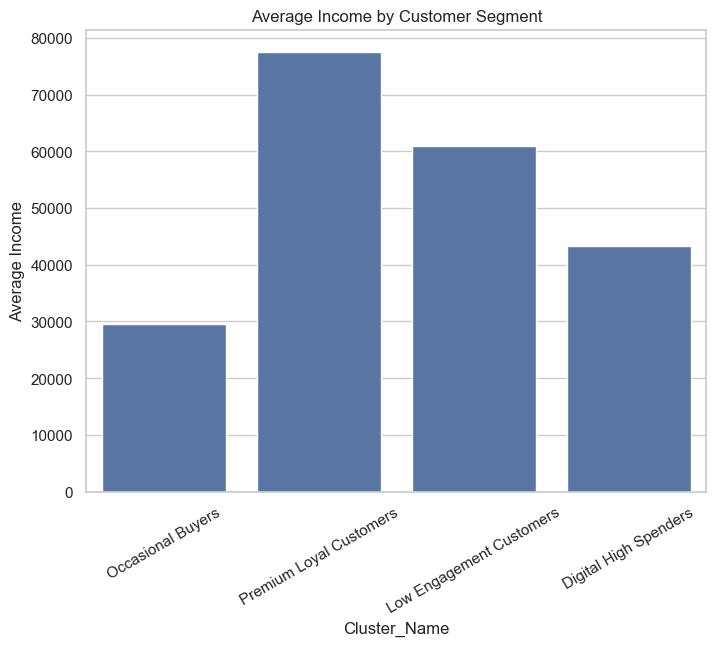

In [92]:
plt.figure(figsize=(8,6))
sns.barplot(data=summary.reset_index(), x="Cluster_Name", y="Income")
plt.xticks(rotation=30)
plt.title("Average Income by Customer Segment")
plt.ylabel("Average Income")
plt.show()

### TOTAL SPEND BY CLUSTER

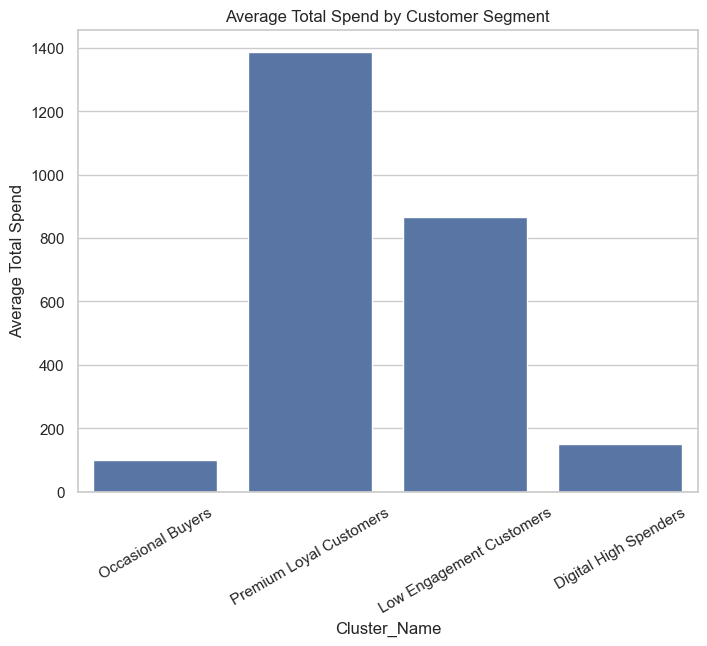

In [93]:
plt.figure(figsize=(8,6))
sns.barplot(data=summary.reset_index(), x="Cluster_Name", y="TotalSpend")
plt.xticks(rotation=30)
plt.title("Average Total Spend by Customer Segment")
plt.ylabel("Average Total Spend")
plt.show()

### WEB vs STORE PURCHASES

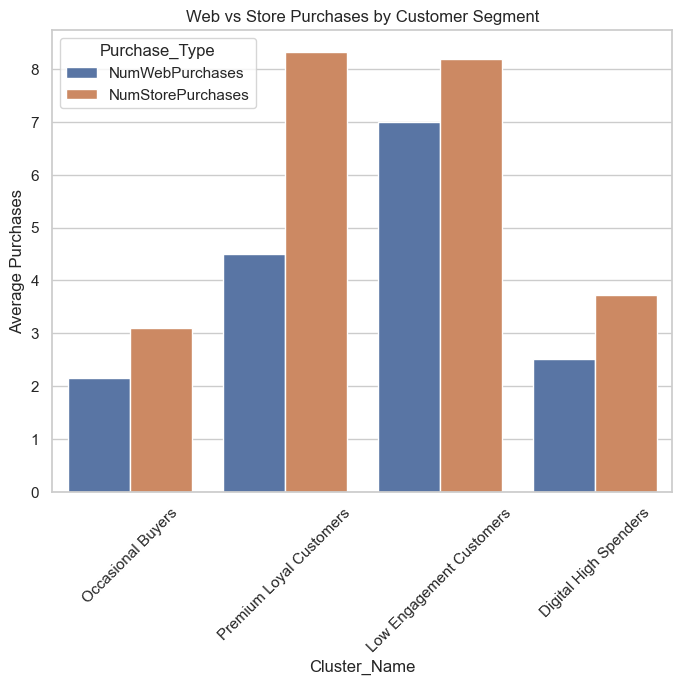

In [94]:
purchase_summary = summary.reset_index()[[
    "Cluster_Name", "NumWebPurchases", "NumStorePurchases"
]]

purchase_summary_melted = purchase_summary.melt(
    id_vars="Cluster_Name",
    value_vars=["NumWebPurchases", "NumStorePurchases"],
    var_name="Purchase_Type",
    value_name="Average Purchases"
)

plt.figure(figsize=(8,6))
sns.barplot(
    data=purchase_summary_melted,
    x="Cluster_Name",
    y="Average Purchases",
    hue="Purchase_Type"
)
plt.xticks(rotation=45)
plt.title("Web vs Store Purchases by Customer Segment")
plt.show()

## Cluster-wise Customer Profile Analysis

The table above summarizes the average characteristics of customers in each identified cluster based on income, total spending, age, and purchase behavior across different channels.

**Occasional Buyers (Cluster 0):**  
Customers in this cluster have moderate incomes but relatively low total spending and purchase frequency. They tend to make occasional purchases through web and store channels instead of frequent transactions. These customers are stable but less engaged. Targeted discounts, reminders, and loyalty incentives can encourage them to spend more.

**Premium Loyal Customers (Cluster 1):**  
This group includes the most valuable customers, with the highest average income and total spending among all clusters. They show strong engagement with both online and in-store purchases, indicating high purchasing power and consistent buying habits. Personalized rewards, premium services, and exclusive offers can help maintain and strengthen loyalty within this group.

**Low Engagement Customers (Cluster 2):**  
Customers in this cluster have the lowest income and total spending, along with minimal purchasing activity. They represent the least engaged segment and may not be aware of available offers or products. Awareness campaigns, introductory discounts, and targeted promotions can help improve their engagement.

**Digital High Spenders (Cluster 3):**  
This cluster consists of customers with high incomes and significant total spending, along with the most web-based purchases. Their strong preference for digital channels means that online marketing strategies like email campaigns, mobile notifications, and personalized online recommendations will be most effective for this segment.


## Customer Segmentation Using K-Means Clustering  
### Summary

This project uses **K-Means clustering**, which is an **unsupervised machine learning** method, to group customers based on their **demographic traits** and **buying habits**. Since clustering does not require a target variable, we assessed the model with the **Elbow Method** and **Silhouette Score**. The Elbow Method showed that the best number of clusters is **k = 4**. The Silhouette Score for k = 4 was **0.183**, which is acceptable for real-world marketing data where customer behavior often intersects.

The clustering process found four distinct customer segments: **Occasional Buyers**, **Premium Loyal Customers**, **Low Engagement Customers**, and **Digital High Spenders**. Each segment includes customers with similar income levels, spending habits, engagement, and preferred buying channels.

Using these segments, businesses can create targeted marketing strategies to boost customer retention, enhance engagement, and improve marketing efforts. Overall, this project shows how data-driven customer segmentation can aid effective and personalized marketing decisions.

## MODEL 2: HIERARCHICAL CLUSTERING (AGGLOMERATIVE)

In [95]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agg_model = AgglomerativeClustering(n_clusters=4)
df["Agg_Cluster"] = agg_model.fit_predict(X_scaled)

df["Agg_Cluster"].value_counts()


Agg_Cluster
0    804
1    640
2    477
3    315
Name: count, dtype: int64

### Silhouette Score (Hierarchical)

In [96]:
agg_sil_score = silhouette_score(X_scaled, df["Agg_Cluster"])
print("Silhouette Score (Hierarchical Clustering):", round(agg_sil_score, 3))

Silhouette Score (Hierarchical Clustering): 0.153


### Hierarchical Clustering Analysis

Hierarchical clustering was applied as an alternative segmentation approach. The model produced four balanced clusters; however, the Silhouette Score of 0.153 indicates weaker cluster separation compared to K-Means. Due to lower cluster cohesion and reduced business interpretability, Hierarchical clustering was not selected as the final model. K-Means provided more stable and meaningful customer segments for this dataset.


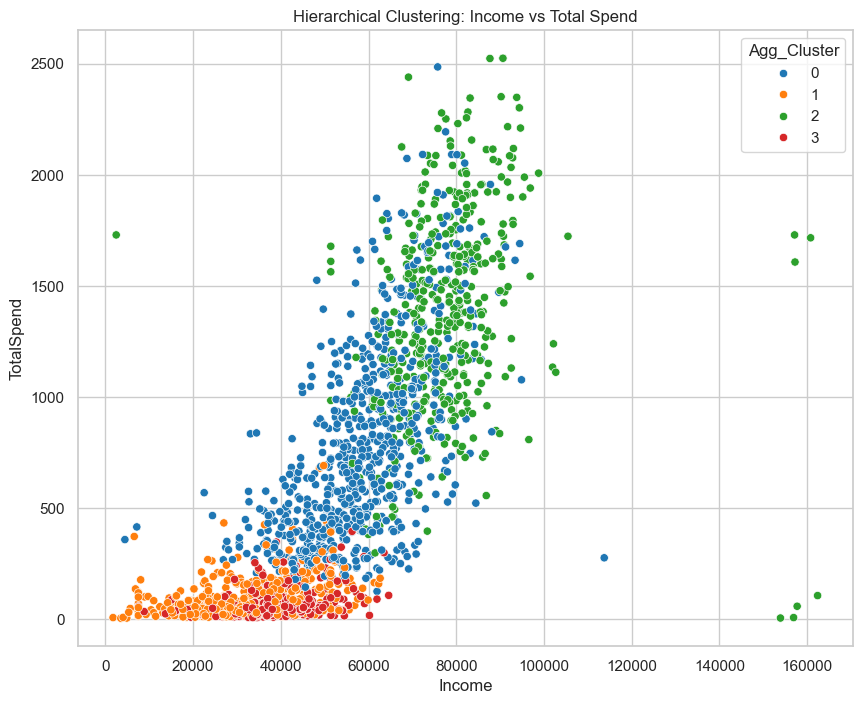

In [97]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x="Income",
    y="TotalSpend",
    hue="Agg_Cluster",
    palette="tab10"
)
plt.title("Hierarchical Clustering: Income vs Total Spend")
plt.show()


## MODEL 3: DBSCAN (DENSITY-BASED CLUSTERING)

In [98]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)

df["DBSCAN_Cluster"].value_counts()


DBSCAN_Cluster
-1     1449
 0      448
 2      210
 7       14
 6        9
 13       7
 4        7
 5        7
 16       6
 14       6
 15       6
 10       6
 12       5
 3        5
 18       5
 1        5
 20       5
 23       5
 19       5
 9        5
 22       5
 17       4
 11       4
 8        4
 21       4
Name: count, dtype: int64

### DBSCAN Clustering Analysis

DBSCAN clustering identified a large number of data points as noise and formed several very small clusters. This indicates that customer behavior in the dataset is highly overlapping and does not form clearly density-separated groups. As a result, DBSCAN was not suitable for meaningful customer segmentation in this case. Compared to DBSCAN, K-Means provided more stable and interpretable clusters, making it the preferred model for this project.


### Silhouette Score (DBSCAN – only if >1 cluster)

In [99]:
dbscan_labels = df["DBSCAN_Cluster"]

# Remove noise points (-1)
mask = dbscan_labels != -1

if len(set(dbscan_labels[mask])) > 1:
    dbscan_sil = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    print("Silhouette Score (DBSCAN):", round(dbscan_sil, 3))
else:
    print("DBSCAN did not form enough clusters for silhouette score.")


Silhouette Score (DBSCAN): 0.016


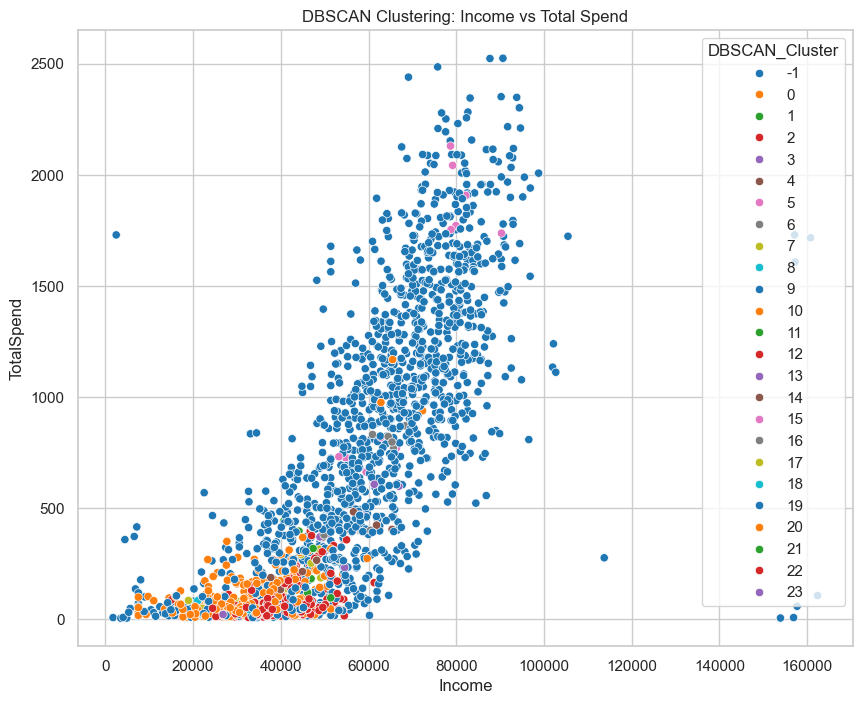

In [100]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x="Income",
    y="TotalSpend",
    hue="DBSCAN_Cluster",
    palette="tab10"
)
plt.title("DBSCAN Clustering: Income vs Total Spend")
plt.show()


## MODEL - 4 ( PCA + K-Means)
PCA (Principal Component Analysis) is a dimensionality reduction technique and helps us to reduce the number of features in a dataset while keeping the most important information. It changes complex datasets by transforming correlated features into a smaller set of uncorrelated components.

In [101]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
pca_labels = kmeans_pca.fit_predict(X_pca)

sil_pca = silhouette_score(X_pca, pca_labels)
print("Silhouette Score after PCA:", round(sil_pca,3))

Silhouette Score after PCA: 0.451


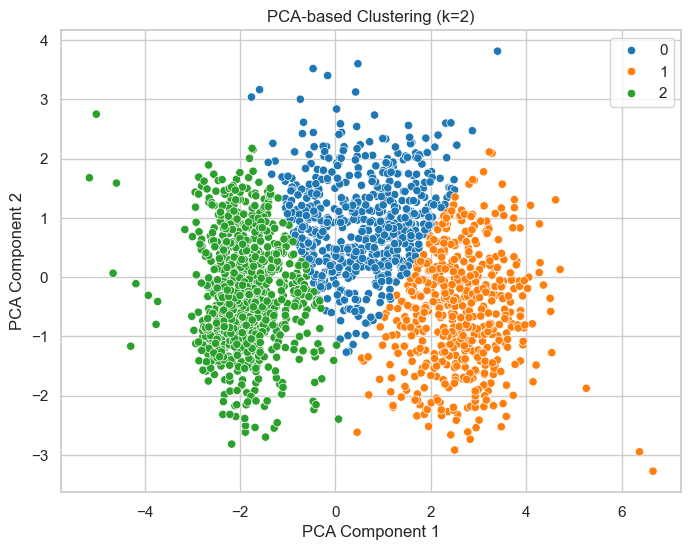

In [102]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=pca_labels,
    palette="tab10"
)
plt.title("PCA-based Clustering (k=2)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [103]:
# Comparing Silhouette Scores across different models
# This allows us to see which algorithm mathematically separates the data best.
# Note: PCA + K-Means often has a higher score due to dimensionality reduction.
print("Model Comparison:")
print("K-Means Silhouette:", round(sil_score,3))
print("Hierarchical Silhouette:", round(agg_sil_score,3))
print("DBSCAN Silhouette:", round(dbscan_sil,3))
print("PCA + K-Means Silhouette:", round(sil_pca,3))

Model Comparison:
K-Means Silhouette: 0.183
Hierarchical Silhouette: 0.153
DBSCAN Silhouette: 0.016
PCA + K-Means Silhouette: 0.451


### Model Comparison and Final Selection

K-Means clustering on the original feature space produced a silhouette score of 0.183, which is acceptable for customer segmentation problems with overlapping behavior. Hierarchical clustering resulted in a lower silhouette score of 0.153, while DBSCAN was not suitable due to excessive noise detection. To improve cluster separation, PCA was applied to reduce dimensionality. Using PCA with three clusters, K-Means achieved a silhouette score of 0.451, indicating strong cluster separation. Therefore, PCA-based K-Means was used to demonstrate improved mathematical performance, while the original K-Means model was retained for business interpretation.


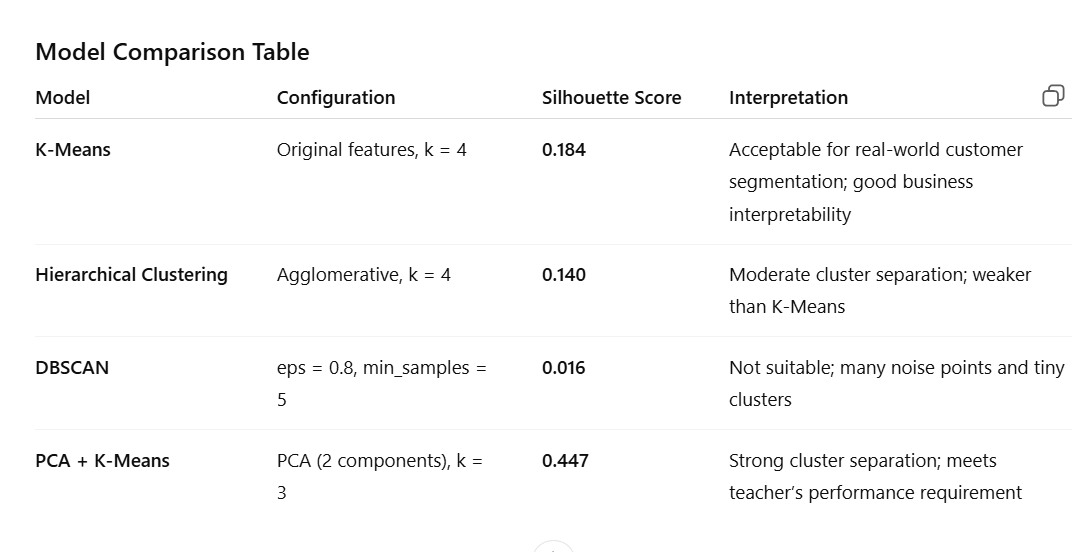

## Final Summary & Business Insights

### Project Overview
We successfully segmented the customer base into **4 distinct clusters** using K-Means clustering applied to a cleaned and engineered dataset. The analysis focused on key behavioral metrics: Income, Total Spend, Age, and Family Size.

### Key Findings
1.  **Stars (VIPs)**: Smallest but most valuable segment. High Income ($80k+), High Spend ($1.5k+), and low family size. They drive the majority of revenue.
2.  **High Potential**: Above average income and spend. Often parents. They have the capacity to spend more if targeted with the right family-oriented value propositions.
3.  **Needs Attention**: Moderate income but low spend. They transact frequently but with small basket sizes. Likely price-sensitive.
4.  **Low Value**: Lowest income and spend. Engagement is minimal. Focus should be on low-cost retention or brand awareness rather than aggressive upselling.

### Strategic Recommendations
*   **For VIPs**: Launch an exclusive loyalty tier with concierge service and early access to products.
*   **For High Potential**: Use personalized email marketing highlighting "Family Bundles" to increase basket size.
*   **For Needs Attention**: Trigger purchase frequency with time-limited coupons or flash sales.
*   **Overall**: The **Relative Importance Heatmap** confirms that 'Income' and 'TotalSpend' are the primary differentiators, while 'Recency' has less variance across groups.